In [433]:
import pandas as pd
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats


df = pd.read_csv("CS Vs Vaginal delivery.csv")
df

,Timestamp,How tall was she(in centimetres)?,How old was she(in years)?\n,Has she given birth before?,What was her gestational age(in weeks)?,Any previous cesarian section?,How many fetuses were present ?,Were there presence of maternal medical condition?,What was the fetal presentation?,Was there presence of placenta previa?,Was there presence of fetal distress?,Previous utherine surgery?,Were there any fetal abnormalities?,How did she give birth?
0,2025/11/07 11:05:36 pm CET,140,41,No,38,No,1,Nothing,Cephalic,No,Yes,No,No,Cesarian section(cs)
1,2025/11/08 5:26:28 am CET,168cm,28,No,34,No,1,NaN,Cephalic,Yes,No,No,No,Vaginal delivery
2,2025/11/08 5:33:44 am CET,165,30,Yes,36,Yes,2,None,Breech,No,No,No,No,Cesarian section(cs)
3,2025/11/08 2:17:50 pm CET,159cm,16,No,36,No,1,None,Breech,No,Yes,No,No,Cesarian section(cs)
4,2025/11/08 2:22:02 pm CET,152cm,12,No,38,No,1,NaN,Cephalic,No,Yes,No,No,Cesarian section(cs)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,2025/12/08 08:51:32 AM CET,1.69m,17years,No,35 weeks,No,1,Lower abdominal pain,Breech,No,No,No,No,Vaginal delivery
996,2025/11/25 04:18:24 PM CET,1.4cm,29years,No,39,No,1,Vaginal warts,Transverse,No,No,No,No,Vaginal delivery
997,2025/11/29 02:41:04 AM CET,1.78m,28years,No,37,No,1,Malaria,Cephalic,Yes,No,No,No,Cesarian section(cs)
998,2025/11/10 03:17:58 PM CET,1.6cm,23,Yes,38weeks,No,2,Diabetes,One cephalic and one breech,No,No,No,Yes,Cesarian section(cs)


In [434]:
#take out the timestamp since it is not needed
df = df.drop("Timestamp", axis = 1)
df

,How tall was she(in centimetres)?,How old was she(in years)?\n,Has she given birth before?,What was her gestational age(in weeks)?,Any previous cesarian section?,How many fetuses were present ?,Were there presence of maternal medical condition?,What was the fetal presentation?,Was there presence of placenta previa?,Was there presence of fetal distress?,Previous utherine surgery?,Were there any fetal abnormalities?,How did she give birth?
0,140,41,No,38,No,1,Nothing,Cephalic,No,Yes,No,No,Cesarian section(cs)
1,168cm,28,No,34,No,1,NaN,Cephalic,Yes,No,No,No,Vaginal delivery
2,165,30,Yes,36,Yes,2,None,Breech,No,No,No,No,Cesarian section(cs)
3,159cm,16,No,36,No,1,None,Breech,No,Yes,No,No,Cesarian section(cs)
4,152cm,12,No,38,No,1,NaN,Cephalic,No,Yes,No,No,Cesarian section(cs)
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1.69m,17years,No,35 weeks,No,1,Lower abdominal pain,Breech,No,No,No,No,Vaginal delivery
996,1.4cm,29years,No,39,No,1,Vaginal warts,Transverse,No,No,No,No,Vaginal delivery
997,1.78m,28years,No,37,No,1,Malaria,Cephalic,Yes,No,No,No,Cesarian section(cs)
998,1.6cm,23,Yes,38weeks,No,2,Diabetes,One cephalic and one breech,No,No,No,Yes,Cesarian section(cs)


In [435]:
def simple_clean_height(height_val):
    """Simple height cleaner"""
    if pd.isna(height_val):
        return None
    
    # Convert to string and clean
    h = str(height_val).strip().lower()
    
    # Remove units
    h = re.sub(r'[cm\s]', '', h)
    
    try:
        num = float(h)
        
        # Convert meters to cm if needed
        if num < 10:  # If it's less than 10, assume meters
            return int(num * 100)
        elif num < 100:  # Could be meters without decimal
            # Check original for decimal
            if '.' in str(height_val):
                return int(num * 100)
            else:
                return int(num)
        else:
            return int(num)
    except:
        return None

# Apply cleaning
df['Height_clean'] = df['How tall was she(in centimetres)? '].apply(simple_clean_height)

# Replace original column
df['How tall was she(in centimetres)? '] = df['Height_clean']

# Drop the temporary column
df = df.drop('Height_clean', axis=1)

print("Cleaned height column:")
print(df['How tall was she(in centimetres)? '].head(10))
df

Cleaned height column:
0    140
1    168
2    165
3    159
4    152
5    156
6    165
7    165
8    160
9    160
Name: How tall was she(in centimetres)? , dtype: int64


,How tall was she(in centimetres)?,How old was she(in years)?\n,Has she given birth before?,What was her gestational age(in weeks)?,Any previous cesarian section?,How many fetuses were present ?,Were there presence of maternal medical condition?,What was the fetal presentation?,Was there presence of placenta previa?,Was there presence of fetal distress?,Previous utherine surgery?,Were there any fetal abnormalities?,How did she give birth?
0,140,41,No,38,No,1,Nothing,Cephalic,No,Yes,No,No,Cesarian section(cs)
1,168,28,No,34,No,1,NaN,Cephalic,Yes,No,No,No,Vaginal delivery
2,165,30,Yes,36,Yes,2,None,Breech,No,No,No,No,Cesarian section(cs)
3,159,16,No,36,No,1,None,Breech,No,Yes,No,No,Cesarian section(cs)
4,152,12,No,38,No,1,NaN,Cephalic,No,Yes,No,No,Cesarian section(cs)
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,169,17years,No,35 weeks,No,1,Lower abdominal pain,Breech,No,No,No,No,Vaginal delivery
996,140,29years,No,39,No,1,Vaginal warts,Transverse,No,No,No,No,Vaginal delivery
997,178,28years,No,37,No,1,Malaria,Cephalic,Yes,No,No,No,Cesarian section(cs)
998,160,23,Yes,38weeks,No,2,Diabetes,One cephalic and one breech,No,No,No,Yes,Cesarian section(cs)


In [436]:
#handle the years ans yrs and change to integers
df["How old was she(in years)?\n"] = df["How old was she(in years)?\n"].astype(str).str.replace('years|yrs', '', regex=True).str.strip()
df["How old was she(in years)?\n"] = pd.to_numeric(df["How old was she(in years)?\n"], errors='coerce')
df

,How tall was she(in centimetres)?,How old was she(in years)?\n,Has she given birth before?,What was her gestational age(in weeks)?,Any previous cesarian section?,How many fetuses were present ?,Were there presence of maternal medical condition?,What was the fetal presentation?,Was there presence of placenta previa?,Was there presence of fetal distress?,Previous utherine surgery?,Were there any fetal abnormalities?,How did she give birth?
0,140,41,No,38,No,1,Nothing,Cephalic,No,Yes,No,No,Cesarian section(cs)
1,168,28,No,34,No,1,NaN,Cephalic,Yes,No,No,No,Vaginal delivery
2,165,30,Yes,36,Yes,2,None,Breech,No,No,No,No,Cesarian section(cs)
3,159,16,No,36,No,1,None,Breech,No,Yes,No,No,Cesarian section(cs)
4,152,12,No,38,No,1,NaN,Cephalic,No,Yes,No,No,Cesarian section(cs)
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,169,17,No,35 weeks,No,1,Lower abdominal pain,Breech,No,No,No,No,Vaginal delivery
996,140,29,No,39,No,1,Vaginal warts,Transverse,No,No,No,No,Vaginal delivery
997,178,28,No,37,No,1,Malaria,Cephalic,Yes,No,No,No,Cesarian section(cs)
998,160,23,Yes,38weeks,No,2,Diabetes,One cephalic and one breech,No,No,No,Yes,Cesarian section(cs)


In [437]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column                                              Non-Null Count  Dtype 
---  ------                                              --------------  ----- 
 0   How tall was she(in centimetres)?                   1000 non-null   int64 
 1   How old was she(in years)?
                         1000 non-null   int64 
 2   Has she given birth before?                         1000 non-null   object
 3   What was her gestational age(in weeks)?             1000 non-null   object
 4   Any previous cesarian section?                      1000 non-null   object
 5   How many fetuses were present ?                     1000 non-null   object
 6   Were there presence of maternal medical condition?  931 non-null    object
 7   What was the fetal presentation?                    1000 non-null   object
 8   Was there presence of placenta previa?              1000 non-null   object
 9   Was there

In [438]:
#handle labels for data
df = df.replace({'Yes': 1, 'No': 0})
df = df.replace({'Vaginal delivery': 1, 'Cesarian section(cs)': 0})
df = df.replace({'One': 1, 'Two': 2})
df

,How tall was she(in centimetres)?,How old was she(in years)?\n,Has she given birth before?,What was her gestational age(in weeks)?,Any previous cesarian section?,How many fetuses were present ?,Were there presence of maternal medical condition?,What was the fetal presentation?,Was there presence of placenta previa?,Was there presence of fetal distress?,Previous utherine surgery?,Were there any fetal abnormalities?,How did she give birth?
0,140,41,0,38,0,1,Nothing,Cephalic,0,1,0,0,0
1,168,28,0,34,0,1,NaN,Cephalic,1,0,0,0,1
2,165,30,1,36,1,2,None,Breech,0,0,0,0,0
3,159,16,0,36,0,1,None,Breech,0,1,0,0,0
4,152,12,0,38,0,1,NaN,Cephalic,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,169,17,0,35 weeks,0,1,Lower abdominal pain,Breech,0,0,0,0,1
996,140,29,0,39,0,1,Vaginal warts,Transverse,0,0,0,0,1
997,178,28,0,37,0,1,Malaria,Cephalic,1,0,0,0,0
998,160,23,1,38weeks,0,2,Diabetes,One cephalic and one breech,0,0,0,1,0


In [439]:
df["What was her gestational age(in weeks)?"] = pd.to_numeric(
    df["What was her gestational age(in weeks)?"].astype(str)
    .str.replace(r'\s*weeks?\s*', '', regex=True)
    .str.strip(),
    errors='coerce'
)
df2 = df
df

,How tall was she(in centimetres)?,How old was she(in years)?\n,Has she given birth before?,What was her gestational age(in weeks)?,Any previous cesarian section?,How many fetuses were present ?,Were there presence of maternal medical condition?,What was the fetal presentation?,Was there presence of placenta previa?,Was there presence of fetal distress?,Previous utherine surgery?,Were there any fetal abnormalities?,How did she give birth?
0,140,41,0,38,0,1,Nothing,Cephalic,0,1,0,0,0
1,168,28,0,34,0,1,NaN,Cephalic,1,0,0,0,1
2,165,30,1,36,1,2,None,Breech,0,0,0,0,0
3,159,16,0,36,0,1,None,Breech,0,1,0,0,0
4,152,12,0,38,0,1,NaN,Cephalic,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,169,17,0,35,0,1,Lower abdominal pain,Breech,0,0,0,0,1
996,140,29,0,39,0,1,Vaginal warts,Transverse,0,0,0,0,1
997,178,28,0,37,0,1,Malaria,Cephalic,1,0,0,0,0
998,160,23,1,38,0,2,Diabetes,One cephalic and one breech,0,0,0,1,0


In [440]:
# Convert to binary: 1 if any condition, 0 if none
df["Were there presence of maternal medical condition?"] = df["Were there presence of maternal medical condition?"].apply(
    lambda x: 0 if str(x).lower().strip() in ['none', 'no', 'nothing', 'nil', 'normal', ''] 
    else 1 if pd.notna(x) and str(x).strip() != '' 
    else 0
)

print(f"Medical condition presence: {df['Were there presence of maternal medical condition?'].value_counts()}")
df

Medical condition presence: Were there presence of maternal medical condition?
1    715
0    285
Name: count, dtype: int64


,How tall was she(in centimetres)?,How old was she(in years)?\n,Has she given birth before?,What was her gestational age(in weeks)?,Any previous cesarian section?,How many fetuses were present ?,Were there presence of maternal medical condition?,What was the fetal presentation?,Was there presence of placenta previa?,Was there presence of fetal distress?,Previous utherine surgery?,Were there any fetal abnormalities?,How did she give birth?
0,140,41,0,38,0,1,0,Cephalic,0,1,0,0,0
1,168,28,0,34,0,1,0,Cephalic,1,0,0,0,1
2,165,30,1,36,1,2,0,Breech,0,0,0,0,0
3,159,16,0,36,0,1,0,Breech,0,1,0,0,0
4,152,12,0,38,0,1,0,Cephalic,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,169,17,0,35,0,1,1,Breech,0,0,0,0,1
996,140,29,0,39,0,1,1,Transverse,0,0,0,0,1
997,178,28,0,37,0,1,1,Cephalic,1,0,0,0,0
998,160,23,1,38,0,2,1,One cephalic and one breech,0,0,0,1,0


In [441]:
#handling multiple options in fetal presentation
fetalPre_dummies = pd.get_dummies(df["What was the fetal presentation?"], prefix="fetalPre", dtype=int)

# drop original fuel type, selling type, transmission, owner column and join dummies
df = df.drop("What was the fetal presentation?", axis=1).join(fetalPre_dummies)
df

,How tall was she(in centimetres)?,How old was she(in years)?\n,Has she given birth before?,What was her gestational age(in weeks)?,Any previous cesarian section?,How many fetuses were present ?,Were there presence of maternal medical condition?,Was there presence of placenta previa?,Was there presence of fetal distress?,Previous utherine surgery?,Were there any fetal abnormalities?,How did she give birth?,fetalPre_Breech,fetalPre_Cephalic,fetalPre_One cephalic and one breech,fetalPre_Transverse,fetalPre_Transverse
0,140,41,0,38,0,1,0,0,1,0,0,0,0,1,0,0,0
1,168,28,0,34,0,1,0,1,0,0,0,1,0,1,0,0,0
2,165,30,1,36,1,2,0,0,0,0,0,0,1,0,0,0,0
3,159,16,0,36,0,1,0,0,1,0,0,0,1,0,0,0,0
4,152,12,0,38,0,1,0,0,1,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,169,17,0,35,0,1,1,0,0,0,0,1,1,0,0,0,0
996,140,29,0,39,0,1,1,0,0,0,0,1,0,0,0,1,0
997,178,28,0,37,0,1,1,1,0,0,0,0,0,1,0,0,0
998,160,23,1,38,0,2,1,0,0,0,1,0,0,0,1,0,0


In [465]:
df = df.fillna(df.mode().iloc[0])

In [466]:
df.isna().sum()

height_cm                               0
age_years                               0
given_birth_before                      0
gestational_age_weeks                   0
previous_cesarian                       0
num_fetuses                             0
maternal_condition                      0
placenta_previa                         0
fetal_distress                          0
previous_uterine_surgery                0
fetal_abnormalities                     0
delivery_mode                           0
fetalPre_Breech                         0
fetalPre_Cephalic                       0
fetalPre_One cephalic and one breech    0
fetalPre_Transverse                     0
fetalPre_Transverse                     0
dtype: int64

In [444]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                                              Non-Null Count  Dtype 
---  ------                                              --------------  ----- 
 0   How tall was she(in centimetres)?                   1000 non-null   int64 
 1   How old was she(in years)?
                         1000 non-null   int64 
 2   Has she given birth before?                         1000 non-null   int64 
 3   What was her gestational age(in weeks)?             1000 non-null   int64 
 4   Any previous cesarian section?                      1000 non-null   int64 
 5   How many fetuses were present ?                     1000 non-null   object
 6   Were there presence of maternal medical condition?  1000 non-null   int64 
 7   Was there presence of placenta previa?              1000 non-null   int64 
 8   Was there presence of fetal distress?               1000 non-null   int64 
 9   Previous 

In [445]:
df['How many fetuses were present ?'] = df['How many fetuses were present ?'].astype(str).str.strip()
df['How many fetuses were present ?'] = pd.to_numeric(df['How many fetuses were present ?'], errors='coerce')

In [446]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   How tall was she(in centimetres)?                   1000 non-null   int64  
 1   How old was she(in years)?
                         1000 non-null   int64  
 2   Has she given birth before?                         1000 non-null   int64  
 3   What was her gestational age(in weeks)?             1000 non-null   int64  
 4   Any previous cesarian section?                      1000 non-null   int64  
 5   How many fetuses were present ?                     997 non-null    float64
 6   Were there presence of maternal medical condition?  1000 non-null   int64  
 7   Was there presence of placenta previa?              1000 non-null   int64  
 8   Was there presence of fetal distress?               1000 non-null   int64  
 9 

In [447]:
df.corr()

,How tall was she(in centimetres)?,How old was she(in years)?\n,Has she given birth before?,What was her gestational age(in weeks)?,Any previous cesarian section?,How many fetuses were present ?,Were there presence of maternal medical condition?,Was there presence of placenta previa?,Was there presence of fetal distress?,Previous utherine surgery?,Were there any fetal abnormalities?,How did she give birth?,fetalPre_Breech,fetalPre_Cephalic,fetalPre_One cephalic and one breech,fetalPre_Transverse,fetalPre_Transverse
How tall was she(in centimetres)?,1.000000,-0.009325,0.038984,0.004338,-0.053106,0.026048,0.013520,0.020691,0.029167,0.018125,-0.012593,-0.041455,0.050828,-0.062764,-0.017065,0.028836,-0.017537
How old was she(in years)?\n,-0.009325,1.000000,0.030900,0.051135,0.044777,0.020431,-0.006156,-0.022985,-0.022616,0.038081,0.033024,0.005197,-0.038799,0.020871,0.013779,0.002956,-0.020929
Has she given birth before?,0.038984,0.030900,1.000000,0.003795,0.049047,0.045092,0.008718,-0.024407,-0.019364,0.076497,-0.028524,0.017481,-0.018107,0.028796,0.014649,-0.025600,0.034557
What was her gestational age(in weeks)?,0.004338,0.051135,0.003795,1.000000,-0.043259,-0.042357,0.003830,-0.090778,-0.006893,0.014448,0.020676,-0.001727,-0.003949,0.048110,-0.011548,-0.028811,0.016852
Any previous cesarian section?,-0.053106,0.044777,0.049047,-0.043259,1.000000,0.013602,0.039439,0.026322,-0.043913,0.018935,-0.027028,-0.154689,0.000336,0.045583,-0.041937,-0.006050,0.073591
How many fetuses were present ?,0.026048,0.020431,0.045092,-0.042357,0.013602,1.000000,-0.018713,-0.055492,-0.026549,0.014969,0.015035,-0.130671,-0.096086,-0.085559,0.211100,-0.046076,0.081829
Were there presence of maternal medical condition?,0.013520,-0.006156,0.008718,0.003830,0.039439,-0.018713,1.000000,-0.012556,0.026706,0.002707,0.009702,-0.088416,0.020922,-0.055702,-0.013282,0.041620,0.019975
Was there presence of placenta previa?,0.020691,-0.022985,-0.024407,-0.090778,0.026322,-0.055492,-0.012556,1.000000,-0.027812,0.060259,-0.000289,-0.075956,0.041150,0.004889,-0.026928,-0.013238,-0.006868
Was there presence of fetal distress?,0.029167,-0.022616,-0.019364,-0.006893,-0.043913,-0.026549,0.026706,-0.027812,1.000000,0.045548,-0.003773,-0.178303,0.036196,-0.054024,-0.009151,0.026555,-0.023216
Previous utherine surgery?,0.018125,0.038081,0.076497,0.014448,0.018935,0.014969,0.002707,0.060259,0.045548,1.000000,0.021289,-0.100212,-0.029578,-0.036878,-0.010793,0.059907,0.097088


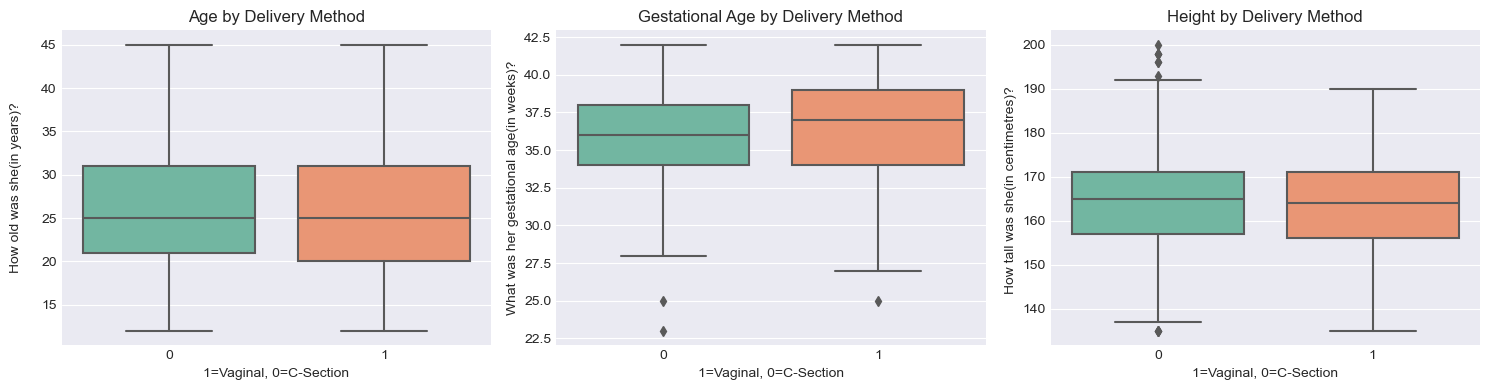

In [448]:
# Clean delivery column
#df['Delivery'] = df['How did she give birth?'].str.contains('cs', case=False).astype(int)

# Create individual plots
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

# Age vs Delivery
sns.boxplot(x='How did she give birth?', y='How old was she(in years)?\n', data=df, ax=axes[0])
axes[0].set_title('Age by Delivery Method')
axes[0].set_xlabel('1=Vaginal, 0=C-Section')

# Gestational Age vs Delivery
sns.boxplot(x='How did she give birth?', y='What was her gestational age(in weeks)?', data=df, ax=axes[1])
axes[1].set_title('Gestational Age by Delivery Method')
axes[1].set_xlabel('1=Vaginal, 0=C-Section')

# Height vs Delivery
sns.boxplot(x='How did she give birth?', y='How tall was she(in centimetres)? ', data=df, ax=axes[2])
axes[2].set_title('Height by Delivery Method')
axes[2].set_xlabel('1=Vaginal, 0=C-Section')

plt.tight_layout()
plt.show()

In [449]:
df1 = df

C:\Users\FP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Column names in your dataset:
0: 'How tall was she(in centimetres)? '
1: 'How old was she(in years)?
'
2: 'Has she given birth before? '
3: 'What was her gestational age(in weeks)?'
4: 'Any previous cesarian section?'
5: 'How many fetuses were present ?'
6: 'Were there presence of maternal medical condition?'
7: 'Was there presence of placenta previa?'
8: 'Was there presence of fetal distress?'
9: 'Previous utherine surgery?'
10: 'Were there any fetal abnormalities?'
11: 'How did she give birth?'
12: 'fetalPre_Breech'
13: 'fetalPre_Cephalic'
14: 'fetalPre_One cephalic and one breech'
15: 'fetalPre_Transverse'
16: 'fetalPre_Transverse '

Delivery column 'How did she give birth?' values:
How did she give birth?
0    656
1    344
Name: count, dtype: int64
Data type: int64
Found height column: How tall was she(in centimetres)? 
Found age column: How old was she(in years)?

Found gestational column: What was her gestational age(in weeks)?

Identified feature columns: {'height': 'How tall wa

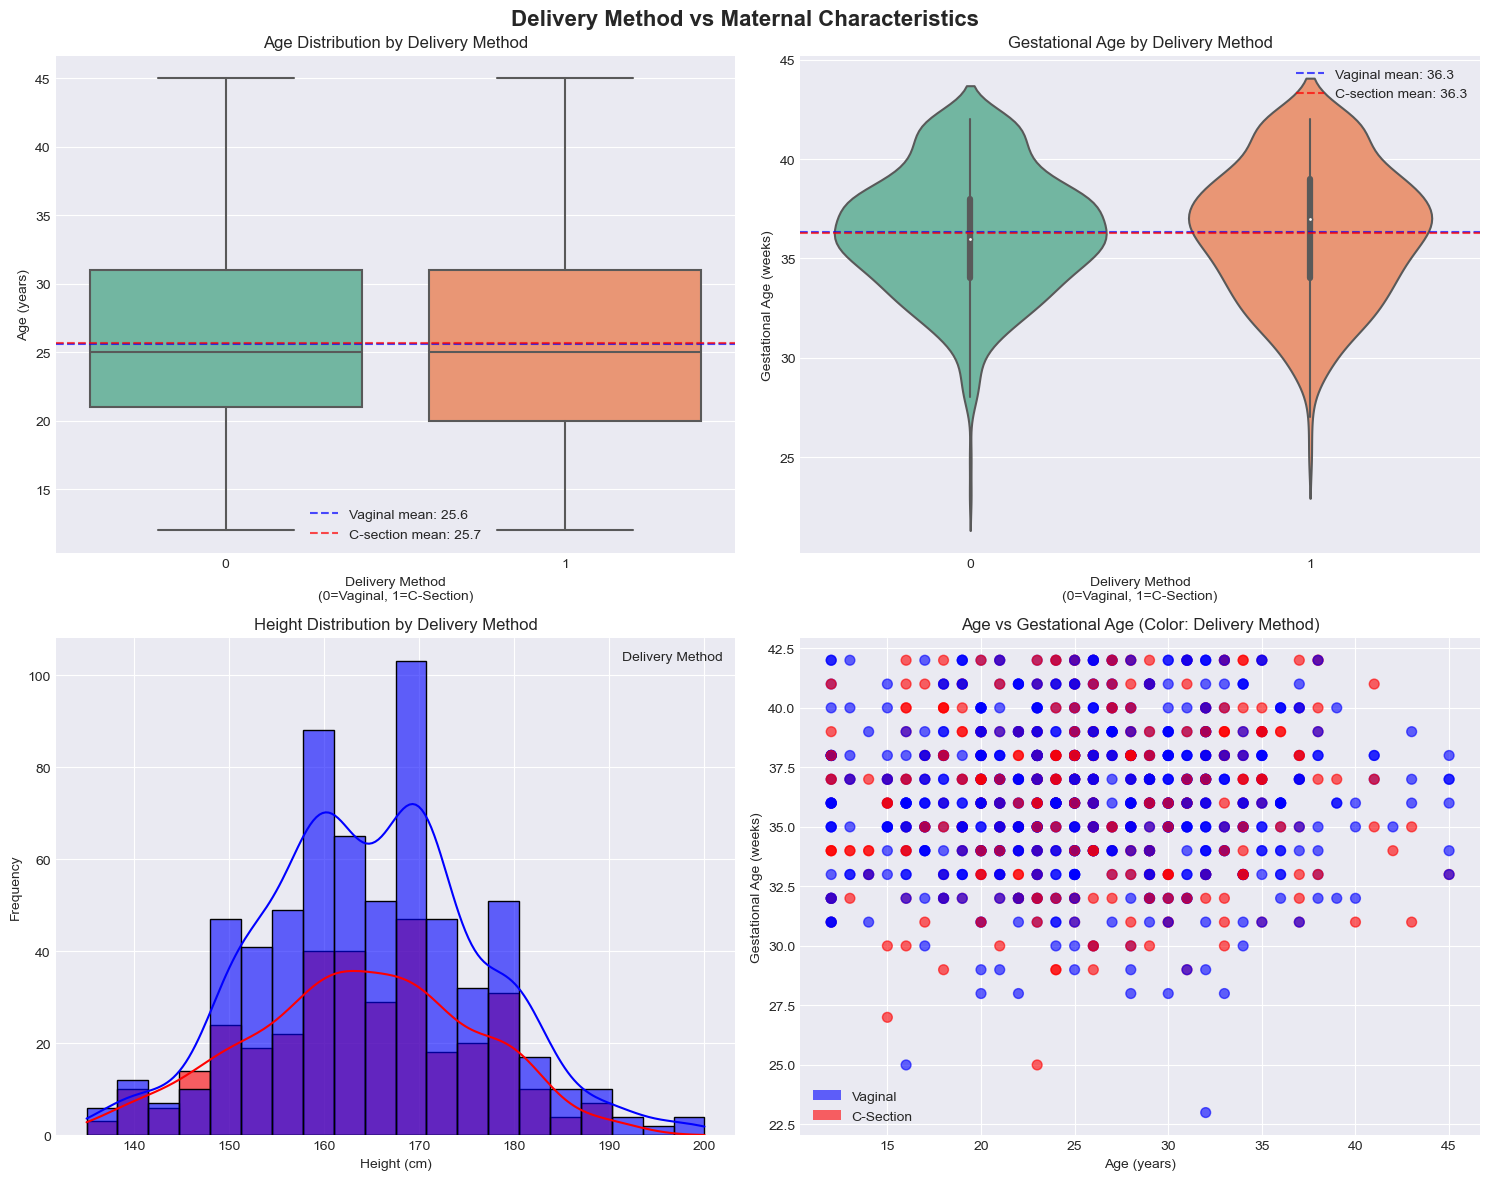


STATISTICAL ANALYSIS

Age Comparison:
  Vaginal delivery (n=656): 25.6 ± 7.0 years
  C-section (n=344): 25.7 ± 7.0 years
  t-statistic: -0.164, p-value: 0.8696
  No significant difference

Gestational Age Comparison:
  Vaginal delivery (n=656): 36.3 ± 3.1 weeks
  C-section (n=344): 36.3 ± 3.3 weeks
  t-statistic: 0.055, p-value: 0.9565
  No significant difference

Height Comparison:
  Vaginal delivery (n=656): 164.8 ± 11.5 cm
  C-section (n=344): 163.7 ± 11.7 cm
  t-statistic: 1.311, p-value: 0.1902
  No significant difference

CORRELATION ANALYSIS


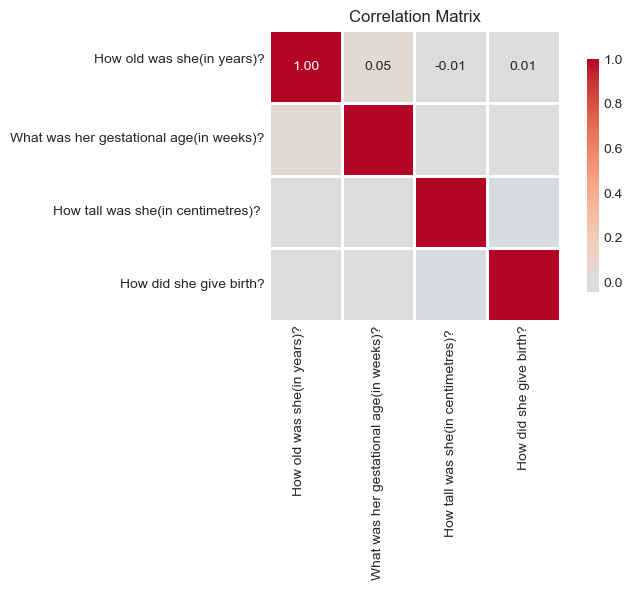


Correlation with Delivery Method (1=C-Section):
  How old was she(in years)?
: 0.005
  What was her gestational age(in weeks)?: -0.002
  How tall was she(in centimetres)? : -0.041


In [450]:
# Print column names to see what you actually have
print("Column names in your dataset:")
for i, col in enumerate(df.columns):
    print(f"{i}: '{col}'")

# Check the delivery column
delivery_col = 'How did she give birth?'
print(f"\nDelivery column '{delivery_col}' values:")
print(df[delivery_col].value_counts())
print(f"Data type: {df[delivery_col].dtype}")

# Identify your feature columns - based on your header
feature_cols = {}

# Check for each column - adjust these based on your actual column names
for col in df.columns:
    col_lower = col.lower()
    if 'tall' in col_lower or 'height' in col_lower:
        feature_cols['height'] = col
        print(f"Found height column: {col}")
    elif 'old' in col_lower or 'age' in col_lower and 'year' in col_lower:
        feature_cols['age'] = col
        print(f"Found age column: {col}")
    elif 'gestat' in col_lower or 'week' in col_lower:
        feature_cols['gestational'] = col
        print(f"Found gestational column: {col}")

print(f"\nIdentified feature columns: {feature_cols}")

# Set style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("Set2")

# Create subplots
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('Delivery Method vs Maternal Characteristics', fontsize=16, fontweight='bold')

# Plot 1: Age Distribution by Delivery Method
if 'age' in feature_cols:
    ax1 = axes[0, 0]
    sns.boxplot(x=delivery_col, y=feature_cols['age'], data=df, ax=ax1)
    ax1.set_xlabel('Delivery Method\n(0=Vaginal, 1=C-Section)')
    ax1.set_ylabel('Age (years)')
    ax1.set_title('Age Distribution by Delivery Method')
    
    # Add mean lines
    mean_vaginal = df[df[delivery_col] == 0][feature_cols['age']].mean()
    mean_csection = df[df[delivery_col] == 1][feature_cols['age']].mean()
    ax1.axhline(mean_vaginal, color='blue', linestyle='--', alpha=0.7, 
               label=f'Vaginal mean: {mean_vaginal:.1f}')
    ax1.axhline(mean_csection, color='red', linestyle='--', alpha=0.7, 
               label=f'C-section mean: {mean_csection:.1f}')
    ax1.legend()

# Plot 2: Gestational Age Distribution by Delivery Method
if 'gestational' in feature_cols:
    ax2 = axes[0, 1]
    sns.violinplot(x=delivery_col, y=feature_cols['gestational'], data=df, ax=ax2)
    ax2.set_xlabel('Delivery Method\n(0=Vaginal, 1=C-Section)')
    ax2.set_ylabel('Gestational Age (weeks)')
    ax2.set_title('Gestational Age by Delivery Method')
    
    # Add mean lines
    mean_vaginal = df[df[delivery_col] == 0][feature_cols['gestational']].mean()
    mean_csection = df[df[delivery_col] == 1][feature_cols['gestational']].mean()
    ax2.axhline(mean_vaginal, color='blue', linestyle='--', alpha=0.7, 
               label=f'Vaginal mean: {mean_vaginal:.1f}')
    ax2.axhline(mean_csection, color='red', linestyle='--', alpha=0.7, 
               label=f'C-section mean: {mean_csection:.1f}')
    ax2.legend()

# Plot 3: Height Distribution by Delivery Method
if 'height' in feature_cols:
    ax3 = axes[1, 0]
    # Filter out NaN values for better visualization
    height_data = df[[feature_cols['height'], delivery_col]].dropna()
    
    # Convert delivery to string for proper hue
    height_data['Delivery_type'] = height_data[delivery_col].map({0: 'Vaginal', 1: 'C-Section'})
    
    sns.histplot(data=height_data, x=feature_cols['height'], hue='Delivery_type', 
                 kde=True, bins=20, ax=ax3, alpha=0.6, palette=['blue', 'red'])
    ax3.set_xlabel('Height (cm)')
    ax3.set_ylabel('Frequency')
    ax3.set_title('Height Distribution by Delivery Method')
    ax3.legend(title='Delivery Method')

# Plot 4: Age vs Gestational Age scatter plot
ax4 = axes[1, 1]
if 'age' in feature_cols and 'gestational' in feature_cols:
    # Prepare data
    scatter_data = df[[feature_cols['age'], feature_cols['gestational'], delivery_col]].dropna()
    
    if len(scatter_data) > 0:
        # Color code by delivery method
        colors = ['blue' if x == 0 else 'red' for x in scatter_data[delivery_col]]
        
        # Plot age vs gestational age
        scatter = ax4.scatter(scatter_data[feature_cols['age']], 
                             scatter_data[feature_cols['gestational']],
                             c=colors, alpha=0.6, s=50)
        ax4.set_xlabel('Age (years)')
        ax4.set_ylabel('Gestational Age (weeks)')
        ax4.set_title('Age vs Gestational Age (Color: Delivery Method)')
        
        # Create custom legend
        from matplotlib.patches import Patch
        legend_elements = [Patch(facecolor='blue', alpha=0.6, label='Vaginal'),
                          Patch(facecolor='red', alpha=0.6, label='C-Section')]
        ax4.legend(handles=legend_elements)
    else:
        ax4.text(0.5, 0.5, 'No data available', ha='center', va='center')
        ax4.set_title('Age vs Gestational Age')

plt.tight_layout()
plt.show()

# Statistical Analysis
print("\n" + "="*60)
print("STATISTICAL ANALYSIS")
print("="*60)

# Age comparison
if 'age' in feature_cols:
    age_vaginal = df[df[delivery_col] == 0][feature_cols['age']].dropna()
    age_csection = df[df[delivery_col] == 1][feature_cols['age']].dropna()
    
    if len(age_vaginal) > 0 and len(age_csection) > 0:
        t_stat, p_val = stats.ttest_ind(age_vaginal, age_csection)
        print(f"\nAge Comparison:")
        print(f"  Vaginal delivery (n={len(age_vaginal)}): {age_vaginal.mean():.1f} ± {age_vaginal.std():.1f} years")
        print(f"  C-section (n={len(age_csection)}): {age_csection.mean():.1f} ± {age_csection.std():.1f} years")
        print(f"  t-statistic: {t_stat:.3f}, p-value: {p_val:.4f}")
        print(f"  {'SIGNIFICANT difference' if p_val < 0.05 else 'No significant difference'}")

# Gestational age comparison
if 'gestational' in feature_cols:
    gest_vaginal = df[df[delivery_col] == 0][feature_cols['gestational']].dropna()
    gest_csection = df[df[delivery_col] == 1][feature_cols['gestational']].dropna()
    
    if len(gest_vaginal) > 0 and len(gest_csection) > 0:
        t_stat, p_val = stats.ttest_ind(gest_vaginal, gest_csection)
        print(f"\nGestational Age Comparison:")
        print(f"  Vaginal delivery (n={len(gest_vaginal)}): {gest_vaginal.mean():.1f} ± {gest_vaginal.std():.1f} weeks")
        print(f"  C-section (n={len(gest_csection)}): {gest_csection.mean():.1f} ± {gest_csection.std():.1f} weeks")
        print(f"  t-statistic: {t_stat:.3f}, p-value: {p_val:.4f}")
        print(f"  {'SIGNIFICANT difference' if p_val < 0.05 else 'No significant difference'}")

# Height comparison
if 'height' in feature_cols:
    height_vaginal = df[df[delivery_col] == 0][feature_cols['height']].dropna()
    height_csection = df[df[delivery_col] == 1][feature_cols['height']].dropna()
    
    if len(height_vaginal) > 0 and len(height_csection) > 0:
        t_stat, p_val = stats.ttest_ind(height_vaginal, height_csection)
        print(f"\nHeight Comparison:")
        print(f"  Vaginal delivery (n={len(height_vaginal)}): {height_vaginal.mean():.1f} ± {height_vaginal.std():.1f} cm")
        print(f"  C-section (n={len(height_csection)}): {height_csection.mean():.1f} ± {height_csection.std():.1f} cm")
        print(f"  t-statistic: {t_stat:.3f}, p-value: {p_val:.4f}")
        print(f"  {'SIGNIFICANT difference' if p_val < 0.05 else 'No significant difference'}")

# Correlation matrix
print("\n" + "="*60)
print("CORRELATION ANALYSIS")
print("="*60)

# Prepare data for correlation
corr_columns = []
for feature in ['age', 'gestational', 'height']:
    if feature in feature_cols:
        corr_columns.append(feature_cols[feature])

if corr_columns:
    corr_data = df[corr_columns + [delivery_col]].dropna()
    
    if len(corr_data) > 0:
        # Calculate correlation matrix
        correlation_matrix = corr_data.corr()
        
        # Plot correlation heatmap
        plt.figure(figsize=(8, 6))
        sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0,
                    square=True, linewidths=1, cbar_kws={"shrink": 0.8},
                    fmt='.2f')
        plt.title('Correlation Matrix')
        plt.tight_layout()
        plt.show()
        
        print("\nCorrelation with Delivery Method (1=C-Section):")
        for col in corr_columns:
            if delivery_col in correlation_matrix.index and col in correlation_matrix.columns:
                corr = correlation_matrix.loc[delivery_col, col]
                print(f"  {col}: {corr:.3f}")

In [451]:
df = df.rename(columns={
    "How tall was she(in centimetres)? ": "height_cm",
    "How old was she(in years)?\n": "age_years",
    "Has she given birth before? ": "given_birth_before",
    "What was her gestational age(in weeks)?": "gestational_age_weeks",
    "Any previous cesarian section?": "previous_cesarian",
    "How many fetuses were present ?": "num_fetuses",
    "Were there presence of maternal medical condition?": "maternal_condition",
    "Was there presence of placenta previa?": "placenta_previa",
    "Was there presence of fetal distress?": "fetal_distress",
    "Previous utherine surgery?": "previous_uterine_surgery",
    "Were there any fetal abnormalities?": "fetal_abnormalities",
    "How did she give birth?": "delivery_mode"
})

In [452]:
df

,height_cm,age_years,given_birth_before,gestational_age_weeks,previous_cesarian,num_fetuses,maternal_condition,placenta_previa,fetal_distress,previous_uterine_surgery,fetal_abnormalities,delivery_mode,fetalPre_Breech,fetalPre_Cephalic,fetalPre_One cephalic and one breech,fetalPre_Transverse,fetalPre_Transverse
0,140,41,0,38,0,1.0,0,0,1,0,0,0,0,1,0,0,0
1,168,28,0,34,0,1.0,0,1,0,0,0,1,0,1,0,0,0
2,165,30,1,36,1,2.0,0,0,0,0,0,0,1,0,0,0,0
3,159,16,0,36,0,1.0,0,0,1,0,0,0,1,0,0,0,0
4,152,12,0,38,0,1.0,0,0,1,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,169,17,0,35,0,1.0,1,0,0,0,0,1,1,0,0,0,0
996,140,29,0,39,0,1.0,1,0,0,0,0,1,0,0,0,1,0
997,178,28,0,37,0,1.0,1,1,0,0,0,0,0,1,0,0,0
998,160,23,1,38,0,2.0,1,0,0,0,1,0,0,0,1,0,0


In [453]:
y = df["delivery_mode"]
x = df.drop(columns = ["delivery_mode"])

In [454]:
numeric_features = [
    "height_cm",
    "age_years",
    "gestational_age_weeks",
    "num_fetuses"
]


In [455]:
binary_features = [
    "given_birth_before",
    "previous_cesarian",
    "maternal_condition",
    "placenta_previa",
    "fetal_distress",
    "previous_uterine_surgery",
    "fetal_abnormalities",
    "fetalPre_Breech",
    "fetalPre_Cephalic",
    "fetalPre_One cephalic and one breech",
    "fetalPre_Transverse"
]


In [480]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer


preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), numeric_features),
        ("bin", "passthrough", binary_features)
    ]
)


In [481]:
from sklearn.linear_model import LogisticRegression

In [482]:
log_reg = LogisticRegression(
    solver="liblinear",
    class_weight="balanced",
    random_state=42
)

In [483]:
from sklearn.pipeline import Pipeline

In [484]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, stratify=y, random_state=42)

In [487]:
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

# Imputer replaces NaNs with column mean
imputer = SimpleImputer(strategy="mean")

# Build a pipeline: impute → scale → logistic regression
pipeline = Pipeline([
    ("imputer", imputer),
    ("scaler", StandardScaler()),       
    ("logreg", LogisticRegression())
])

pipeline.fit(X_train, y_train)


Pipeline(steps=[('imputer', SimpleImputer()), ('scaler', StandardScaler()),
                ('logreg', LogisticRegression())])

In [491]:
y_pred = pipeline.predict(X_test)
y_proba = pipeline.predict_proba(X_test)[:, 1]

risk_score = y_proba * 100

In [492]:
from sklearn.metrics import roc_auc_score, recall_score, brier_score_loss

print("ROC-AUC:", roc_auc_score(y_test, y_proba))
print("Recall:", recall_score(y_test, y_pred))
print("Brier Score:", brier_score_loss(y_test, y_proba))

ROC-AUC: 0.6823763690673746
Recall: 0.2898550724637681
Brier Score: 0.206807849386597


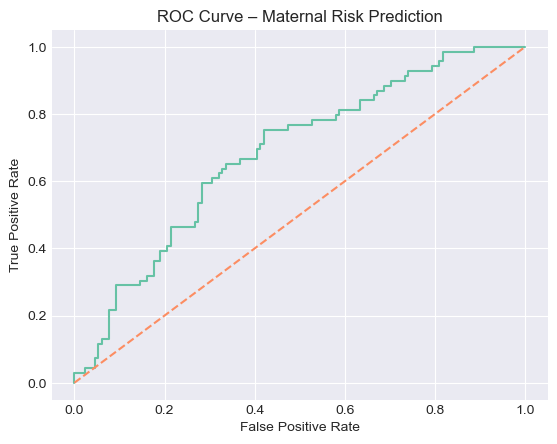

In [493]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

fpr, tpr, _ = roc_curve(y_test, y_proba)

plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve – Maternal Risk Prediction")
plt.show()